In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imagenet_df = pd.read_csv("./result_final/resnet18_24_07_24_15_58/descriptions.csv")

In [3]:
print(imagenet_df.head())

    layer  unit description  similarity
0  layer3     0    charcoal    0.116852
1  layer3     1        mesh    0.154572
2  layer3     2  vegetation    0.187653
3  layer3     3        leaf    0.340790
4  layer3     4      dotted    0.146790


In [22]:
def top_concept_learned_plot(df, n=20):
    grouped = df.groupby('layer')
    for layer, group in grouped:
        layer_description_count = group['description'].value_counts().nlargest(n)
        plt.figure()
        layer_description_count.plot(kind='bar')
        plt.xlabel('Description')
        plt.ylabel('Count')
        plt.title(f'Top {n} Description Count for {layer}')
        plt.tight_layout()
        plt.show()

In [34]:
def similarity_plot(df, n=20):
    grouped = df.groupby('layer')
    
    for layer, group in grouped:
        top_n_descriptions = group['description'].value_counts().nlargest(n).index
        filtered_group = group[group['description'].isin(top_n_descriptions)]
        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=filtered_group, x='unit', y='similarity', hue='description', palette='tab10')
        plt.xlabel('Neuron Unit')
        plt.ylabel('Similarity Score')
        plt.title(f'Scatter Plot of Neurons Similarity Scores by Description - {layer} (Top {n} Concepts)')
        plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

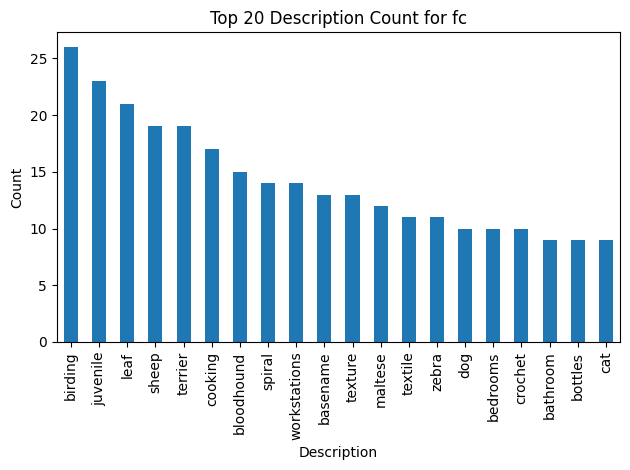

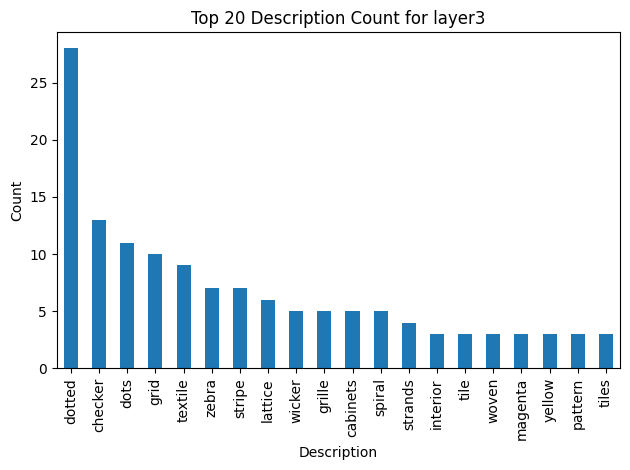

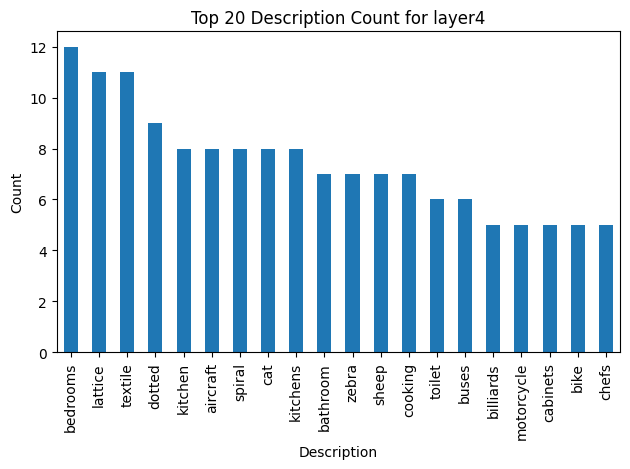

In [23]:
top_concept_learned_plot(imagenet_df, 20)

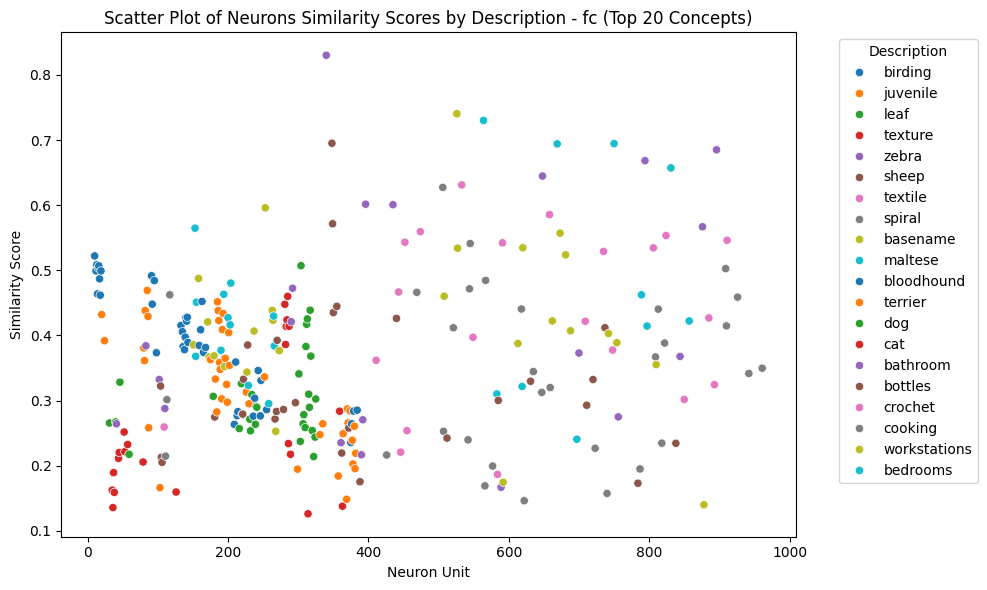

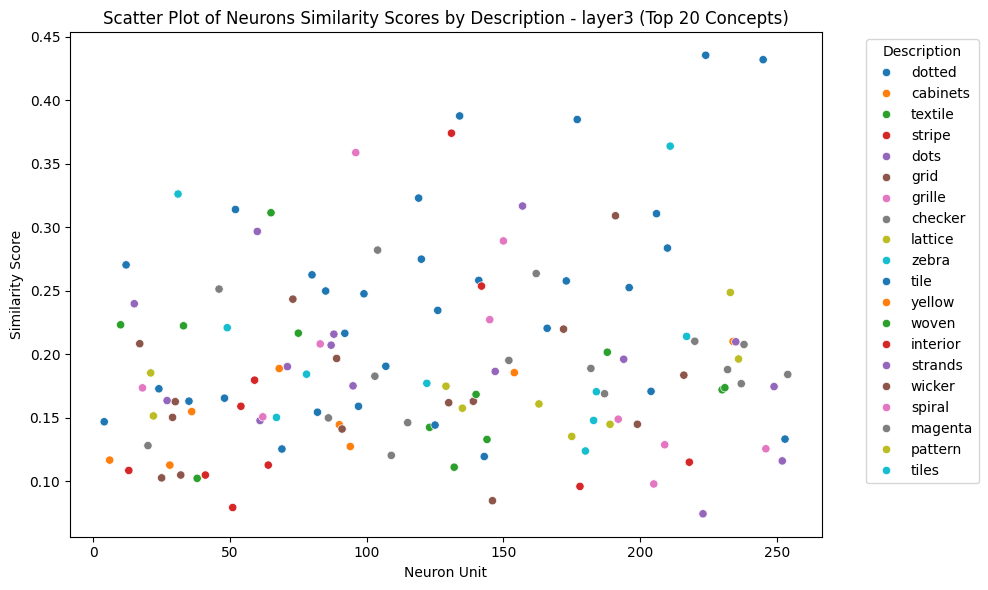

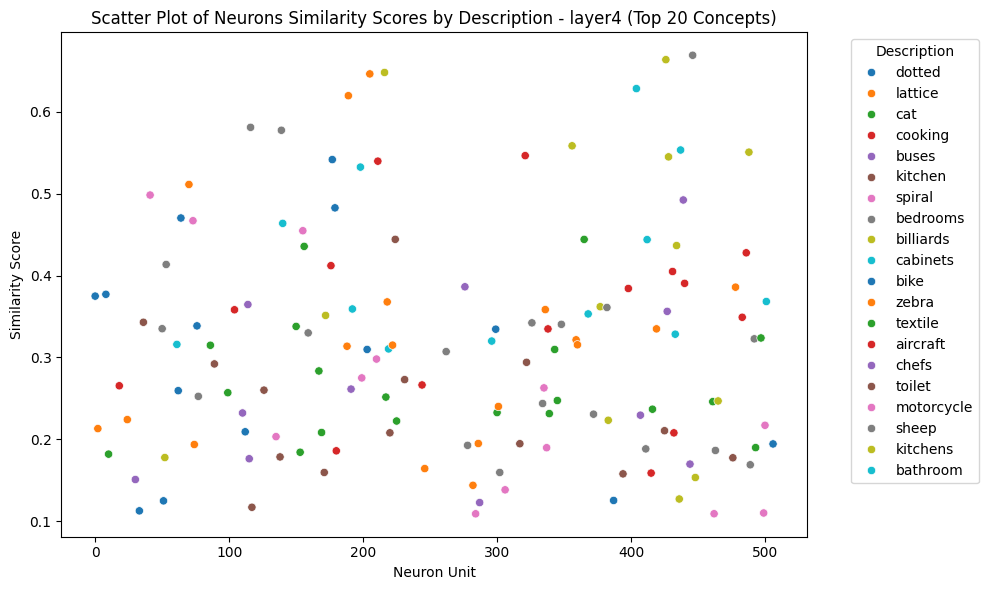

In [35]:
similarity_plot(imagenet_df)

In [24]:
places365_df = pd.read_csv("./result_final/resnet18_places_24_07_24_15_45/descriptions.csv")

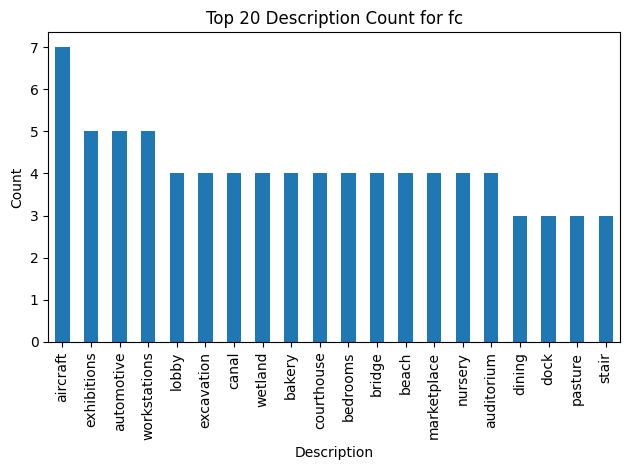

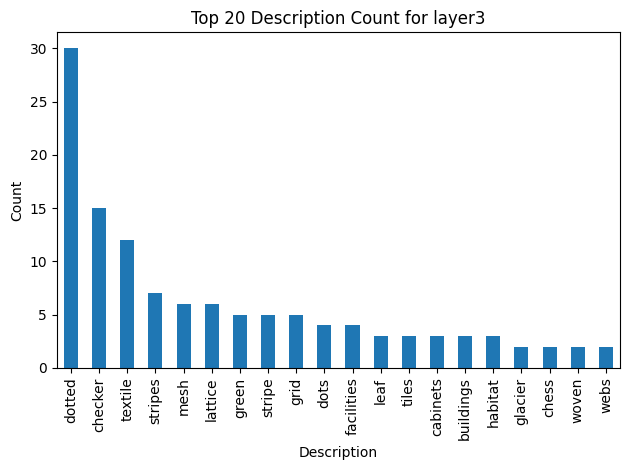

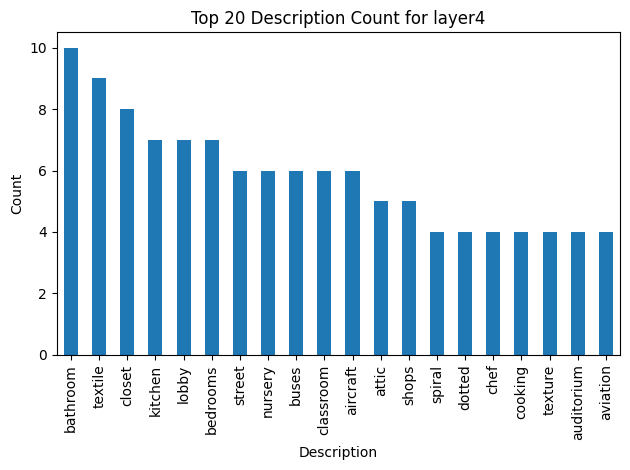

In [26]:
top_concept_learned_plot(places365_df, 20)

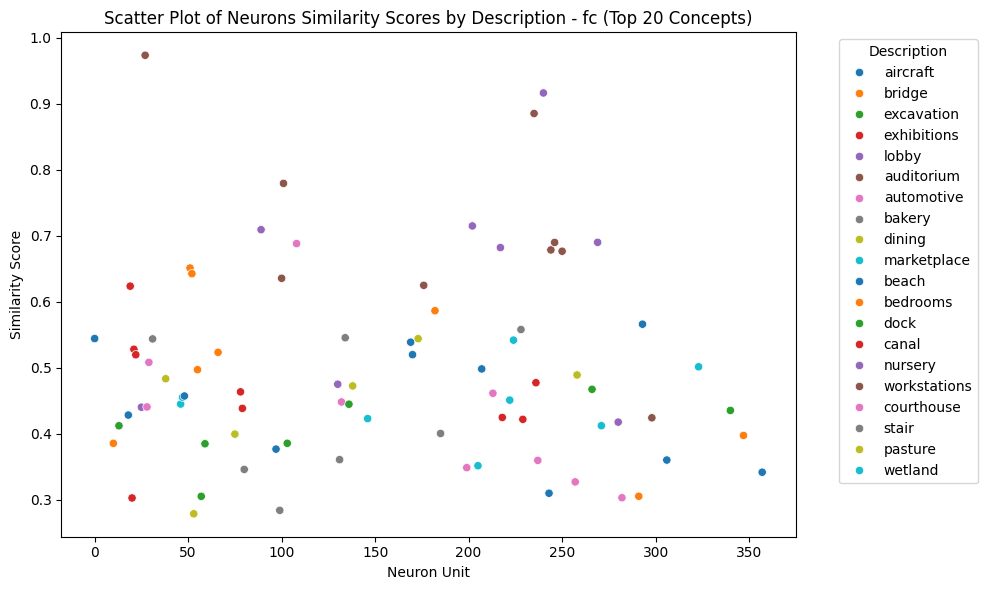

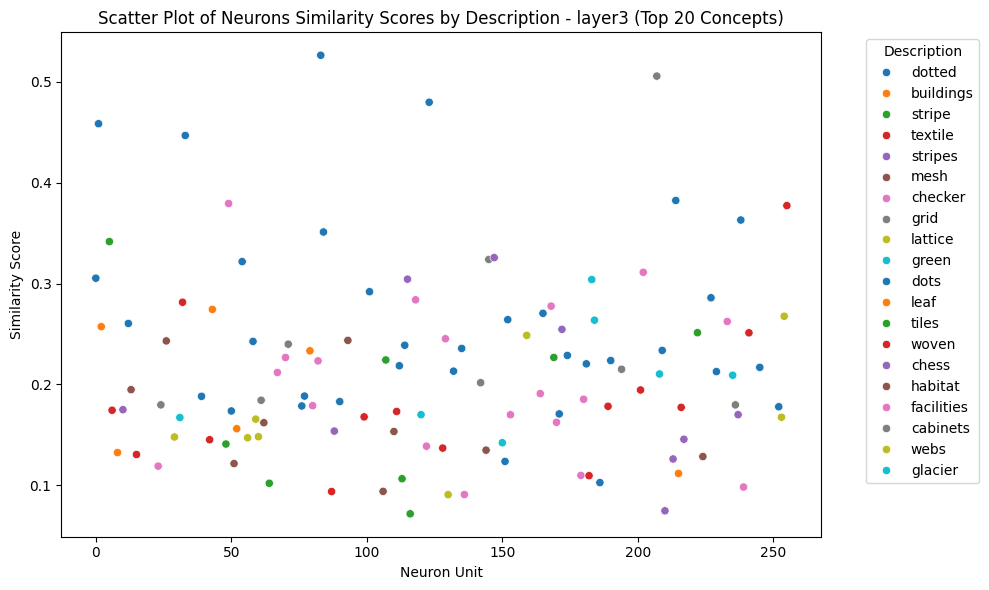

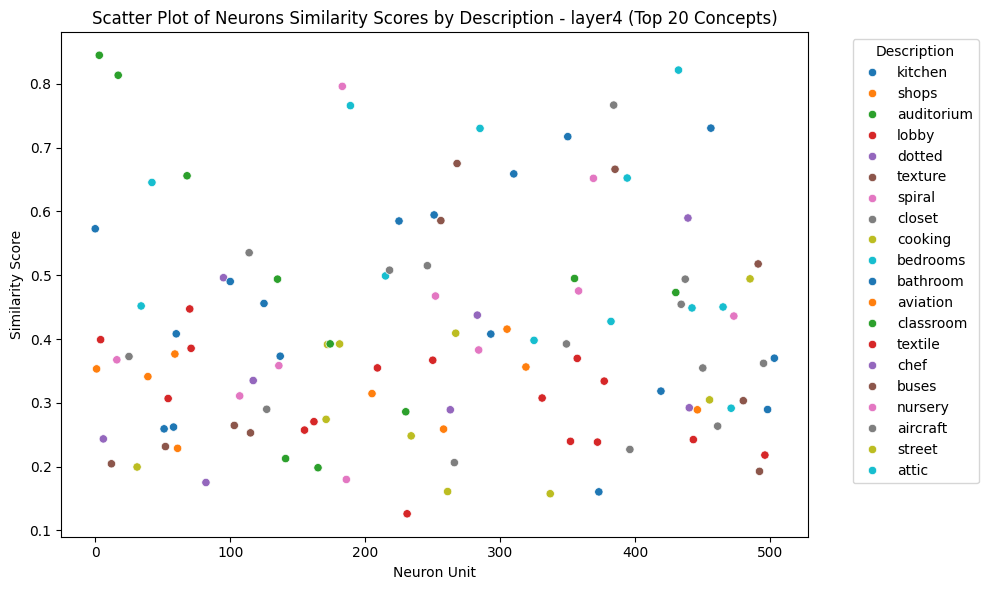

In [36]:
similarity_plot(places365_df)